<a href="https://colab.research.google.com/github/ecg360/Python-DataScience-MachineLearning/blob/master/Copy_of_Continious_Forecasting_Coronaepedemy_Germany.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#    # Forecast Corona Epedemie Deutschland

Dieses Notebook versucht, den epedemischen Verlauf der Coronadurchseuchung für Deutschland im Verlauf der Zeit approxi-
mieren. Datengrundlage sind Daten über bestätigte Neuinfektionen in Deutschland je Bundesland aus der Morgenpost.

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import math
plt.style.use('fivethirtyeight')

In [0]:
df = pd.read_csv('confirmed_DE_MoPo_FC.csv')
#data.head(5)
df['logInfections'] = np.log(df.Infected)
#data['logInfections'] = 0
df['Predicted_I'] = 0.
df.head(3)

,Time,Infected,Infected_t_1,Recovered,growth_p,Dead,logInfections,Predicted_I
0,1,1.0,NaN,0,NaN,NaN,0.000000,0.0
1,2,4.0,3.0,0,NaN,NaN,1.386294,0.0
2,3,4.0,4.0,0,NaN,NaN,1.386294,0.0


In [0]:
#Calculate growth per day (growth_p)
df['growth_p'] = (df['Infected']/df['Infected_t_1'] - 1.)*100

In [0]:
#Calculate growth per day - weighted avg (2 days) (growth_p)
df['growth_p'] = ((df['Infected']-df['Infected_t_1'])/2)

In [0]:
#Calculate fatalties per 100 confirmed infecrted (fatalties_p)
df['fatalties_p'] = (df['Dead']/df['Infected'])*1000

In [0]:
df['fatalties_p'].tail(10)

62     8.217543
63     9.708885
64     9.044164
65    11.686959
66    13.137283
67    13.986551
68    14.924280
69    15.756219
70    16.501974
71    18.725096
Name: fatalties_p, dtype: float64

In [0]:
#Calculate recovered per 100 confirmed infecrted over time (recovered_p)
df['recovered_p'] = (df['Recovered']/df['Infected'])*100

In [0]:
df.head(40)
#Changing format of data type of infections
#df = data
#df.dtypes
#df['Infected'].astype('int').head(5)

,Time,Infected,Infected_t_1,Recovered,growth_p,Dead,logInfections,Predicted_I,fatalties_p,recovered_p
0,1,1.0,NaN,0,NaN,NaN,0.000000,0.0,NaN,0.000000
1,2,4.0,3.0,0,33.333333,NaN,1.386294,0.0,NaN,0.000000
2,3,4.0,4.0,0,0.000000,NaN,1.386294,0.0,NaN,0.000000
3,4,5.0,4.0,0,25.000000,NaN,1.609438,0.0,NaN,0.000000
4,5,7.0,5.0,0,40.000000,NaN,1.945910,0.0,NaN,0.000000
5,6,8.0,7.0,0,14.285714,NaN,2.079442,0.0,NaN,0.000000
6,7,10.0,8.0,0,25.000000,NaN,2.302585,0.0,NaN,0.000000
7,8,12.0,10.0,0,20.000000,NaN,2.484907,0.0,NaN,0.000000
8,9,12.0,12.0,0,0.000000,NaN,2.484907,0.0,NaN,0.000000
9,10,12.0,12.0,0,0.000000,NaN,2.484907,0.0,NaN,0.000000


In [0]:
df.tail(20)

,Time,Infected,Infected_t_1,Recovered,growth_p,Dead,logInfections,Predicted_I,fatalties_p,recovered_p
52,53,15322.0,12329.0,17,24.276097,44.0,9.637045,0.0,2.871688,0.110952
53,54,19850.0,15322.0,182,29.552278,68.0,9.895959,0.0,3.425693,0.916877
54,55,22366.0,19850.0,241,12.675063,84.0,10.015297,0.0,3.755701,1.077528
55,56,24875.0,22366.0,268,11.217920,94.0,10.121619,0.0,3.778894,1.077387
56,57,29056.0,24875.0,453,16.808040,123.0,10.276980,0.0,4.233205,1.559058
57,58,32991.0,29056.0,3290,13.542814,159.0,10.403990,0.0,4.819496,9.972417
58,59,37323.0,32991.0,3547,13.130854,206.0,10.527365,0.0,5.519385,9.503523
59,60,43211.0,37323.0,5677,15.775795,262.0,10.673850,0.0,6.063271,13.137858
60,61,49039.0,43211.0,6932,13.487306,323.0,10.800371,0.0,6.586594,14.135688
61,62,54268.0,49039.0,8481,10.662942,403.0,10.901690,0.0,7.426107,15.627994


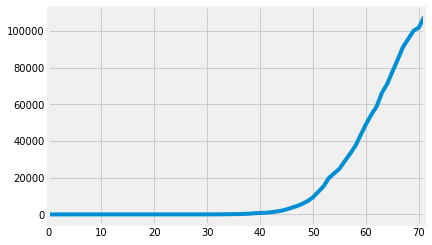

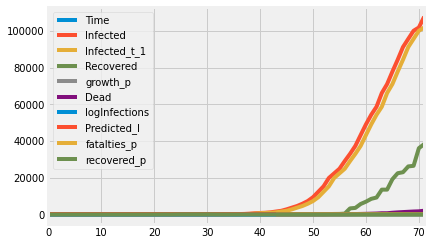

In [0]:
lines = df.Infected.plot.line()
lines_all = df.plot.line()

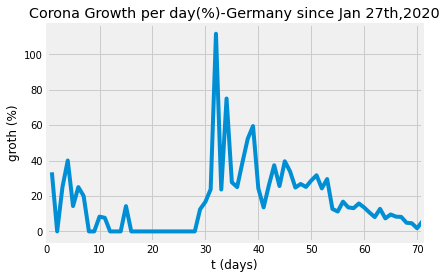

In [0]:
#Creating a plot of the actual data row based on daily observations
lines = df.growth_p.plot.line()
plt.title("Corona Growth per day(%)-Germany since Jan 27th,2020")
plt.xlabel("t (days)")
plt.ylabel("groth (%)");


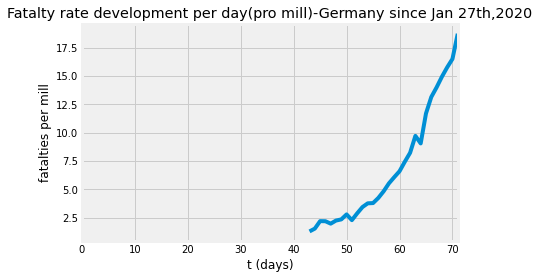

In [0]:
#Creating a plot of the actual data row based on daily observations
lines = df.fatalties_p.plot.line()
plt.title("Fatalty rate development per day(pro mill)-Germany since Jan 27th,2020")
plt.xlabel("t (days)")
plt.ylabel("fatalties per mill");

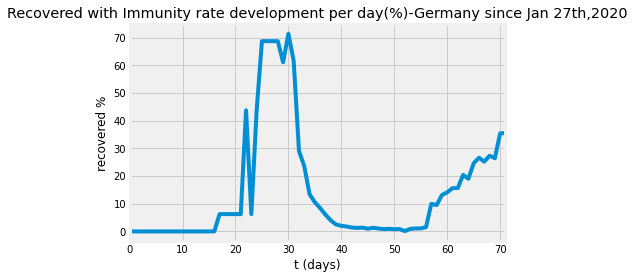

In [0]:
#Creating a plot of the actual data row based on daily observations
lines = df.recovered_p.plot.line()
plt.title("Recovered with Immunity rate development per day(%)-Germany since Jan 27th,2020")
plt.xlabel("t (days)")
plt.ylabel("recovered %");

In [0]:
X = df.Time
X = sm.add_constant(X)

C:\Users\KarstenMeyer\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [0]:
y = df.logInfections
y.head(5)

0    0.000000
1    1.386294
2    1.386294
3    1.609438
4    1.945910
Name: logInfections, dtype: float64

In [0]:
mod = sm.OLS(y,X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          logInfections   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     1043.
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           8.68e-44
Time:                        03:12:51   Log-Likelihood:                -95.498
No. Observations:                  72   AIC:                             195.0
Df Residuals:                      70   BIC:                             199.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1616      0.220     -0.734      0.4

Zu lösen sind folgende Gleichungen:

3 * x0 + 1 * x1 = 9
1 * x0 + 2 * x1 = 8
Die Koeffizienten kommen in die entsprechenden numpy-Arrays, dann ruft man linalg.solve auf:

import numpy as np
 
a = np.array([[3,1], [1,2]])
b = np.array([9,8])
x = np.linalg.solve(a, b)
print(x) # gibt [ 2.  3.]

In [0]:
#a=-0.1616 ...steht unter coef (const)
#b=0.1693 ...steht unter coef (Time)

In [0]:
import math   # This will import math module

X_0 =math.exp(-0.1616)
b = math.exp(0.1693)
s = 'The value of X_0 is ' + repr(X_0) + ', and b is ' + repr(b)
print(s)

The value of X_0 is 0.8507814490664177, and b is 1.1844754282563819


In [0]:
df.tail(5)

,Time,Infected,Infected_t_1,Recovered,growth_p,Dead,logInfections,Predicted_I,fatalties_p,recovered_p
67,68,91159.0,84264.0,22981,8.182617,1275.0,11.420361,0.0,13.986551,25.209798
68,69,95616.0,91159.0,26144,4.889259,1427.0,11.468095,0.0,14.924280,27.342704
69,70,100024.0,95616.0,26469,4.610107,1576.0,11.513165,0.0,15.756219,26.462649
70,71,101806.0,100024.0,36081,1.781572,1680.0,11.530824,0.0,16.501974,35.440937
71,72,107663.0,101806.0,38287,5.753099,2016.0,11.586761,0.0,18.725096,35.561892


# Now we can go back to the original formula for exponential growth and fill in those values to find out the actual value for the coronavirus case:
#x(t)= x_0 + b**t wo t die Anzahl der Tage ist.
#in unserem Modell: an Tag 34, also am 3.4. haben wir dann die folgende Zahl von Infektionen:

In [0]:
for i in range (72,100):
    df.Predicted_I[i] = 0.8507814490664177 + (1.1844754282563819)**i    

In [0]:
df.Predicted_I[70] = 0.8507814490664177 + (1.1844754282563819)**70
df.Predicted_I[70]

140225.35236988563

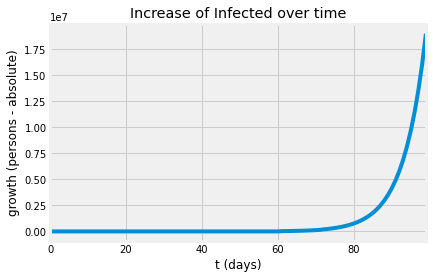

In [0]:
#Creating a plot of the actual data row based on daily observations
lines = df.Predicted_I.plot.line()
plt.title("Prediction of Infected next 30 days")
plt.xlabel("t (days)")
plt.ylabel("growth (persons - absolute)");

comparing this graph to the actuals figures shows that we have left the exponential area of wave 1. 

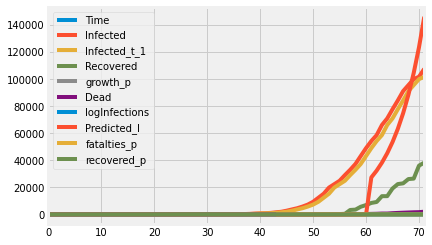

In [0]:
lines_all = df.plot.line()

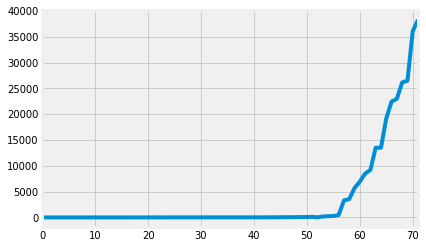

In [0]:
lines = df.Recovered.plot.line()

Ermittlung des Anteils der ITS Patienten basierend auf den Istzahlen bis heute sowie FC
#Assumption: Duration from to=confirmed infection until t1=ITS is 8 days on the average
5% of all infected need ITS treatment

In [0]:
#Ermittlung des Bedarfs an ITS* Plätzen                                   *ITS = Intensivstation

In [0]:
#Annahme: 
# Patienten kommen im Durchschnitt nach 8 Tagen auf die ITS
# 5% der Infizierten Patienten benötigen ITS Behandlung im Laufe der Erkrankung
# Man bleibt im Durchschnitt 5 Tage auf er Intensivstation

# Summary: ITS Bedarf für Berlin stand 22.3.2020, basierend auf Zahlen aus der Morgenpost...

In [0]:
df_final = pd.read_csv('Corona_ITS_Bedarf_Forecast_20 Tage.csv')             
#Corona_ITS_Bedarf_Forecast_20 Tage

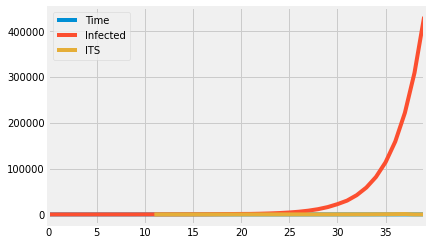

In [0]:
#Creating a plot of the actual data row based on daily observations
lines = df_final.plot.line()

In [0]:
#heute muss die "Sättigung eingebaut werden"

The SIR epidemic model
A simple mathematical description of the spread of a disease in a population is the so-called SIR model, which divides the (fixed) population of N individuals into three "compartments" which may vary as a function of time, t:

S(t) are those susceptible but not yet infected with the disease; I(t) is the number of infectious individuals; R(t) are those individuals who have recovered from the disease and now have immunity to it. The SIR model describes the change in the population of each of these compartments in terms of two parameters, β and γ. β describes the effective contact rate of the disease: an infected individual comes into contact with βN other individuals per unit time (of which the fraction that are susceptible to contracting the disease is S/N). γ is the mean recovery rate: that is, 1/γ is the mean period of time during which an infected individual can pass it on.

The differential equations describing this model were first derived by Kermack and McKendrick [Proc. R. Soc. A, 115, 772 (1927)]:

dSdtdIdtdRdt=−βSIN,=βSIN−γI,=γI. The following Python code integrates these equations for a disease characterised by parameters β=0.2, 1/γ=10days in a population of N=1000 (perhaps 'flu in a school). The model is started with a single infected individual on day 0: I(0)=1. The plotted curves of S(t), I(t) and R(t) are styled to look a bit nicer than Matplotlib's defaults.


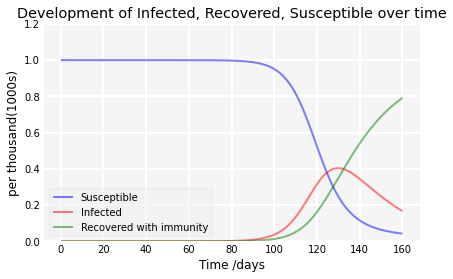

In [0]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total population, N.
N = 82790000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.4, 1./10
#Social Distancing rho
rho = 0.5
#uc = 4.0 #unreported cases
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma,rho):
    S, I, R = y
    dSdt = -beta * S * I / N * rho
    dIdt = (beta * S * I / N - gamma * I)*rho
    dRdt = gamma * I*rho
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma,rho))
S, I, R = ret.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')

#ax = fig.add_subplot(111, axis_bgcolor='#dddddd', axisbelow=True)
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/82790000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/82790000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/82790000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('per thousand(1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)

ax.set_facecolor(color='whitesmoke')
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)    
plt.title("Development of Infected, Recovered, Susceptible over time")
plt.show()
#plt.title("Growth per day (%)")
#plt.xlabel("t (days)")
#plt.ylabel("groth (%)");

In [0]:
I[64],R[64],S[64]

(15678.42548000612, 5226.6884269982465, 82769094.88609302)

In [0]:
#Einbau des unknown cases:
#Annahme: Faktor 4, d.h. es gibt 4 mal soviele Infektionen

In [0]:
I_uc = I*1.4
R_uc = R*1.4
S_uc = 82790000 - I_uc - R_uc

In [0]:
#Manuelle Eingabe des aktuellen Tages (i)
i=64
#Werte ohne "Unknown cases" 
I[i],R[i],S[i]


(15678.42548000612, 5226.6884269982465, 82769094.88609302)

In [0]:
#Manuelle Eingabe des aktuellen Tages (i)
i=64
#Werte ohne "Unknown cases" 
I_uc[i], R_uc[i],S_uc[i]

(21949.795672008568, 7317.363797797545, 82760732.84053019)

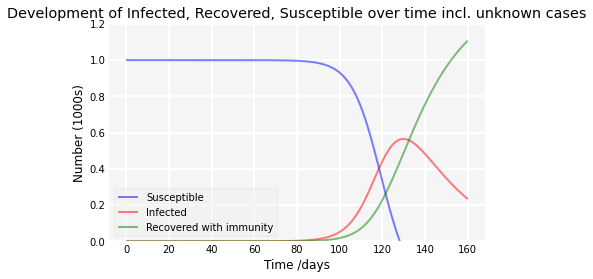

In [0]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')

#ax = fig.add_subplot(111, axis_bgcolor='#dddddd', axisbelow=True)
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S_uc/82790000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I_uc/82790000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R_uc/82790000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)

ax.set_facecolor(color='whitesmoke')
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)  
plt.title("Development of Infected, Recovered, Susceptible over time incl. unknown cases")
plt.show()

In [0]:
for i in range (4,120):
    growth = (I_uc[i]/I_uc[i-1]*100)-100
    s = ('The growth factor on day ',i, 'is ', growth)
    #s = growth
    print(s)    

('The growth factor on day ', 4, 'is ', 16.29308298553751)
('The growth factor on day ', 5, 'is ', 16.293086525955985)
('The growth factor on day ', 6, 'is ', 16.2930804996346)
('The growth factor on day ', 7, 'is ', 16.293082848892908)
('The growth factor on day ', 8, 'is ', 16.29308207317031)
('The growth factor on day ', 9, 'is ', 16.29308201979927)
('The growth factor on day ', 10, 'is ', 16.293081803707693)
('The growth factor on day ', 11, 'is ', 16.293082047009165)
('The growth factor on day ', 12, 'is ', 16.293080683875516)
('The growth factor on day ', 13, 'is ', 16.29308040118474)
('The growth factor on day ', 14, 'is ', 16.293080335076922)
('The growth factor on day ', 15, 'is ', 16.29307983002552)
('The growth factor on day ', 16, 'is ', 16.29307930573391)
('The growth factor on day ', 17, 'is ', 16.29307866342839)
('The growth factor on day ', 18, 'is ', 16.29307805280476)
('The growth factor on day ', 19, 'is ', 16.29307729747542)
('The growth factor on day ', 20, 'is ', 

In [0]:
for i in range (40,120):
    s = ('The value of I_uc',i, 'is ', I_uc[i])
    print(s)

('The value of I_uc', 40, 'is ', 586.5155903089508)
('The value of I_uc', 41, 'is ', 682.0760650547169)
('The value of I_uc', 42, 'is ', 793.2059354004793)
('The value of I_uc', 43, 'is ', 922.4418117897474)
('The value of I_uc', 44, 'is ', 1072.733552847665)
('The value of I_uc', 45, 'is ', 1247.5115810724915)
('The value of I_uc', 46, 'is ', 1450.7651605693113)
('The value of I_uc', 47, 'is ', 1687.1334213572848)
('The value of I_uc', 48, 'is ', 1962.0112044313241)
('The value of I_uc', 49, 'is ', 2281.672138810734)
('The value of I_uc', 50, 'is ', 2653.411753462437)
('The value of I_uc', 51, 'is ', 3085.7138819952147)
('The value of I_uc', 52, 'is ', 3588.4441465779296)
('The value of I_uc', 53, 'is ', 4173.074921414881)
('The value of I_uc', 54, 'is ', 4852.946888937797)
('The value of I_uc', 55, 'is ', 5643.573129389748)
('The value of I_uc', 56, 'is ', 6562.992644856844)
('The value of I_uc', 57, 'is ', 7632.181333006285)
('The value of I_uc', 58, 'is ', 8875.529717942904)
('The 